# 20 - 即插即用估计量
 
到目前为止，我们已经了解了如何在干预不是随机分配的情况下对我们的数据进行纠偏，这会导致混淆偏差。这有助于我们解决因果推理中的识别问题。换句话说，一旦单位是可交换的，或者 \\( Y(0), Y(1) \perp X\\)，就可以学习干预效果。但我们还远远没有完成。
 
识别意味着我们可以找到平均的干预效果。换句话说，我们知道一种干预的平均效果。当然，这很有用，因为它可以帮助我们决定是否应该真正实施干预。但我们想要的不止这些。我们想知道是否存在对干预反应更好或更差的单位亚组。这应该允许一个更好的策略，我们只对那些将从中受益的人进行干预。
 
 
## 问题设置
 
让我们回顾一下我们感兴趣的设置。鉴于潜在结果，我们可以将个体颗粒度的干预效果定义为潜在结果之间的差异。
 
$
\tau_i = Y_i(1) - Y_i(0),
$
 
或者，连续处理情况，\\(\tau_i = \partial Y(t)\\)，其中 \\(t\\) 是处理变量。当然，我们永远无法观察个体的干预效果，因为我们只能看到潜在的结果之一
 
$
Y^{obs}_i(t)= 
\begin{cases}
Y_i(1), & \text{if } t=1\\
Y_i(0), & \text{if } t=0
\end{cases}
$
 
我们可以将平均干预效果 (ATE) 定义为
 
$
\tau = E[Y_i(1) - Y_i(0)] = E[\tau_i]
$
 
和条件平均干预效果（CATE）为
 
$
\tau(x) = E[Y_i(1) - Y_i(0)|X] = E[\tau_i|X]
$
 
在本书的第一部分，我们主要关注 ATE。现在，我们对 CATE 很感兴趣。 CATE 对于个性化决策过程很有用。例如，如果您有一种药物作为干预方法 \\(t\\)，您想知道哪种类型的患者对药物的反应更高（更高的 CATE），以及是否有某些类型的患者有负面反应（类别 < 0)。
 
我们已经了解了如何使用线性回归以及干预和特征之间的交互来估计 CATE
 
$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i。
$
 
如果我们估计这个模型，我们可以得到 \\(\tau(x)\\) 的估计值
 
$
\hat{\tau}(x) = \hat{\beta}_1 + \hat{\beta}_3 t_i X_i
$
 
尽管如此，线性模型仍有一些缺点。主要的一个是对 \\(X\\) 的线性假设。请注意，您甚至不关心此模型上的 \\(\beta_2\\)。但是，如果特征 \\(X\\) 与结果没有线性关系，则您对因果参数 \\(\\beta_1\\) 和 \\(\\beta_3\\) 的估计将不正确。
 
如果我们可以用更灵活的机器学习模型代替线性模型，那就太好了。我们甚至可以将处理作为特征插入 ML 模型，例如提升树（boosted tree）或神经网络
 
$
y_i = M(X_i, T_i) + e_i
$
 
但我们如何从模型获得干预效果的估计值还不清楚，因为这个模型将输出 \\(\hat{y}\\) 预测，而不是 \\(\hat{\tau(x)}\\)预测。理想情况下，我们将使用机器学习回归模型，而不是最小化结果 MSE
 
$
E[(Y_i - \hat{Y}_i)^2]
$
 
将最小化干预效果 MSE
 
$
E[(\tau(x)_i - \hat{\tau}(x)_i)^2] = E[(Y_i(1) - Y_i(0) - \hat{\tau}(x)_i)^ 2]。
$
 
但是，这个标准就是我们所说的不可行。同样，这里的问题是 \\(\tau(x)_i\\) 是不可观察的，所以我们不能直接优化它。这让我们陷入了困境……让我们试着把它简化一下，也许我们可以想到一些事情。

![img](./data/img/plug-and-play-estimators/infeasible.png)

## 目标转换
 
假设您的干预是二元的。假设您是一家投资公司，正在测试发送金融教育电子邮件的有效性。你希望这封电子邮件能让人们进行更多投资。另外，假设您进行了一项随机研究，其中 50% 的客户收到了电子邮件，而另外 50% 的客户没有收到。
 
这是一个疯狂的想法：让我们通过将结果变量与干预相乘来转换结果变量。
 
$
Y^*_i = 2 Y_i * T_i - 2 Y_i*(1-T_i)
$
 
 
因此，如果单位被处理，您将取结果并将其乘以 2。如果未处理，您将取结果并将其乘以 -2。例如，如果您的一位客户投资了 2000,00 巴西雷亚尔并收到了电子邮件，则转换后的目标将为 4000。但是，如果他或她没有收到电子邮件，则为 -4000。
 
这似乎很奇怪，因为您说电子邮件的效果可以是负数，但对我来说是无用的。如果我们做一些数学运算，我们可以看到，平均或预期，这个转换后的目标将是干预效果。这简直太不可思议了。我要说的是，通过应用这种有点古怪的转换，我可以估计一些我什至无法观察到的东西。
 
要理解这一点，我们需要一些数学知识。由于随机分配，我们有 \\(T \perp Y(1), Y(1)\\)，这是我们的老朋友。这意味着 \\(E[T, Y(t)]=E[T]*E[Y(t)]\\)，这是独立性的定义。


另外，我们知道

$
Y_i*T_i = Y_(1)i*T_i \text{ 和 } Y_i*(1-T_i) = Y_(0)i*T_i
$

因为干预是实现一种或其他潜在结果的原因。考虑到这一点，让我们取 \\(Y^*_i\\) 的期望值，看看我们最终会得到什么。
 
$
\begin{align}
E[Y^*_i|X_i=x] &= E[2 Y(1)_i * T_i - 2 Y(0)_i*(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i * T_i | X_i=x] - 2E[Y(0)_i*(1-T_i)|X_i=x]\\
&= 2E[Y(1)_i| X_i=x] * E[ T_i | X_i=x] - 2E[Y(0)_i| X_i=x]*E[(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i| X_i=x] * 0.5 - 2E[Y(0)_i| X_i=x]*0.5 \\ 
&= E[Y(1)_i| X_i=x] - E[Y(0)_i| X_i=x] \\
&= \tau(x)_i
\end{align}
$
 
因此，这个看似疯狂的想法最终成为了对个体干预效果的无偏估计 \\(\tau(x)_i\\)。现在，我们可以将不可行的优化标准替换为
 
$
E[(Y^*_i - \hat{\tau}(x)_i)^2]
$
 
简单来说，我们所要做的就是使用任何回归机器学习模型来预测 \\(Y^*_i\\) 并且该模型将输出干预效果预测。
 
既然我们已经解决了简单的情况，那么更复杂的情况呢，干预不是 50% 50%，甚至不是随机分配的呢？事实证明，答案有点复杂，但并不多。首先，如果我们没有随机分配，我们至少需要条件独立 \\(T \perp Y(1), Y(1) | X\\)。也就是说，控制 \\(X\\), \\(T\\) 与随机一样好。这样，我们可以将转换后的目标泛化为
 
$
Y^*_i = Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}
$
 
其中 \\(e(X_i)\\) 是倾向得分。因此，如果干预不是 50% 50%，而是以不同的概率 \\(p\\) 随机化，您所要做的就是将上述公式中的倾向得分替换为 \\(p\\)。如果干预不是随机的，那么您必须使用存储或估计的倾向得分。
 
如果您对此进行预期，您会发现它也与干预效果相匹配。证明留给读者作为练习。开个玩笑，就在这里。这有点麻烦，所以请随意跳过它。
 
$
\begin{align}
E[Y^*_i|X_i=x] &= E\big[Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big] \\
&= E\big[Y_i T_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))} + Y_i (1-T_i) * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= E\big[Y(1)_i * \dfrac{T_i(1 - e(X_i))}{e(X_i)(1-e(X_i))} | X_i=x\big] - E\big[Y(0)_i * \dfrac{(1-T_i)e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i * T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i * (1-T_i)| X_i=x]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i|X_i=x] * E[T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i|X_i=x] * E[(1-T_i)| X_i=x]\\
&= E[Y(1)_i|X_i=x] - E[Y(0)_i|X_i=x]\\
&= \tau(x)_i
\end{align}
$
 
与往常一样，我认为这将通过一个示例变得更加具体。同样，考虑一下我们发送的试图让人们进行更多投资的投资电子邮件。结果变量二进制（投资与未投资）“转换”。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nb21 import cumulative_gain, elast

In [2]:
email = pd.read_csv("./data/invest_email_rnd.csv")
email.head()

,age,income,insurance,invested,em1,em2,em3,converted
0,44.1,5483.80,6155.29,14294.81,0,1,1,0
1,39.8,2737.92,50069.40,7468.15,1,0,0,0
2,49.0,2712.51,5707.08,5095.65,1,0,1,1
3,39.7,2326.37,15657.97,6345.20,1,1,1,0
4,35.3,2787.26,27074.44,14114.86,1,1,1,0


我们的目标是个性化之一。 让我们关注 email-1。 我们希望仅将其发送给那些对其反应更好的客户。 换句话说，我们希望估计 email-1 的条件平均处理效果
 
$
E[Converted(1)_i - Converted(0)_i|X_i=x] = \tau(x)_i
$
 
这样我们就可以定位那些对电子邮件反应最好的客户（更高的 CATE）
 
但首先，让我们将数据集分解为训练集和验证集。 我们将在一组上估计 \\(\tau(x)_i\\) 并评估另一组的估计。

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
train, test = train_test_split(email, test_size=0.4)
print(train.shape, test.shape)

(9000, 8) (6000, 8)


现在，我们将应用我们刚刚学习的目标转换。 由于电子邮件是随机分配的（尽管不是在 50% 50% 的基础上），我们不需要担心倾向得分。 相反，它是恒定的并且等于干预概率。

In [4]:
y = "converted"
T = "em1"
X = ["age", "income", "insurance", "invested"]

ps = train[T].mean()

y_star_train = train[y] * (train[T] - ps)/(ps*(1-ps))

使用转换后的目标，我们可以选择任何 ML 回归算法来预测它。 让我们在这里使用提升树（boosted tree）。

In [1]:
from lightgbm import LGBMRegressor

np.random.seed(123)
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)
cate_learner.fit(train[X], y_star_train);

NameError: name 'np' is not defined

该模型现在可以估计 \\(\tau(x)_i\\)。 换句话说，它输出的是 \\(\hat{\tau}(x)_i\\)。 例如，如果我们对测试集进行预测，我们会看到某些单元的 CATE 比其他单元高。 例如，客户 6958 的 CATE 为 0.1，这意味着如果我们向该客户发送电子邮件，他或她购买我们的投资产品的概率预计会增加 0.1。 相反，对于客户 3903，预计购买该产品的概率仅增加 0.04。

In [6]:
test_pred = test.assign(cate=cate_learner.predict(test[X]))
test_pred.head()

,age,income,insurance,invested,em1,em2,em3,converted,cate
6958,40.9,4486.14,37320.33,12559.25,0,0,1,0,0.105665
7534,42.6,6386.19,13270.47,29114.42,0,0,1,0,0.121922
2975,47.6,1900.26,25588.72,2420.39,0,0,1,0,0.034161
3903,41.0,5802.19,57087.37,20182.20,1,0,1,1,0.046805
8437,49.1,2202.96,5050.81,9245.88,1,0,1,0,-0.009099


为了评估这个模型有多好，我们可以展示训练集和测试集的累积增益曲线。

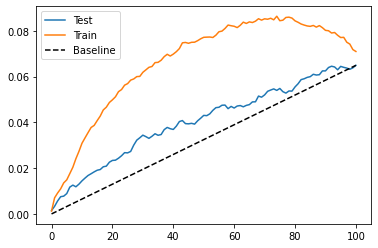

In [7]:
gain_curve_test = cumulative_gain(test_pred, "cate", y="converted", t="em1")
gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[X])), "cate", y="converted", t="em1")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test, "converted", "em1")], linestyle="--", color="black", label="Baseline")
plt.legend();

正如我们所看到的，这个即插即用的估计器在测试集上比随机的要好。 尽管如此，它看起来还是过拟合了很多，因为在训练集上的表现比在测试集上的表现要好得多。
 
这实际上是这种目标转换技术的最大缺点之一。 使用此目标转换，您确实获得了很多简单性，因为您只需转换目标并使用任何 ML 估计器来预测异构干预效果。 它的代价是你会得到很多差异。 这是因为转换后的目标是对个体干预效果的非常嘈杂的估计，并且该方差会转移到您的估计中。 如果您没有大量数据，这将是一个大问题，但在处理超过 1MM 样本的大数据应用程序中应该问题不大。

## 连续型干预变量案例

![img](./data/img/plug-and-play-estimators/second-estimator.png)

目标转换方法的另一个明显缺点是它仅适用于离散或二元处理。这是你在因果推理文献中经常看到的东西。大多数研究都是针对二元干预案例进行的，但您找不到很多关于连续干预的研究。这让我很困扰，因为在这个行业中，持续干预无处不在，主要是您需要优化的价格形式。因此，即使我找不到任何关于持续干预的目标转换的信息，我还是想出了一些在实践中有效的方法。请记住，我没有围绕它进行的超级可靠的计量经济学研究。
 
为了激发它，让我们回到冰淇淋销售的例子。在那里，我们的任务是估计价格的需求弹性，以便我们可以更好地设定冰淇淋价格以优化我们的收入。回想一下，数据集中的事件样本是一天，我们希望知道人们何时对价格上涨不那么敏感。另外，回想一下，价格在这个数据集中是随机分配的，这意味着我们不需要担心混淆偏差。

In [8]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
prices_rnd.head()

,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


和之前一样，让我们先把数据分为训练和测试两个集合。

In [9]:
np.random.seed(123)
train, test = train_test_split(prices_rnd, test_size=0.3)
train.shape, test.shape

((3500, 5), (1500, 5))


现在是我们需要一点创造力的地方。对于离散情况，条件平均处理效果由当我们从未处理到处理时结果变化多少给出，以单位特征 \\(X\\) 为条件。
 
$
\tau(x) = E[Y_i(1) - Y_i(0)|X] = E[\tau_i|X]
$
 
简而言之，这是估计处理对不同单元配置文件的影响，其中配置文件是使用特征 \\(X\\) 定义的。对于连续的情况，我们没有那个开关。单元未经处理或未经处理。相反，它们都经过处理，但强度不同。因此，我们不能谈论给予干预的效果。相反，我们需要从增加干预的角度说话。换句话说，我们想知道如果我们增加一定量的干预，结果会如何变化。这就像估计结果函数 \\(Y\\) 对干预 \\(t\\) 的偏导数。并且因为我们希望知道对于每个组（CATE，而不是 ATE），我们以特征 \\(X\\) 为条件
 
$
\tau(x) = E[\partial Y_i(t)|X] = E[\tau_i|X]
$
 
我们如何估计呢？首先，让我们考虑一个简单的情况，其中结果与干预呈线性关系。假设您有两种类型的日子：炎热的日子（黄色）和寒冷的日子（蓝色）。在寒冷的日子里，人们对价格上涨更加敏感。此外，随着价格上涨，需求线性下降。
 
![img](./data/img/plug-and-play-estimators/linear-case.png)
 
在这种情况下，CATE 将是每条需求线的斜率。这些斜率将告诉我们，如果我们将价格提高任何数量，需求会下降多少。如果这种关系确实是线性的，我们可以分别用简单线性回归估计热天和冷天的系数来估计这些弹性。
 
$$
\hat{\tau(x)} = Cov(Y_i, T_i)/Var(T_i) = \dfrac{\sum(Y_i- \bar{Y})(T_i - \bar{T})}{\sum ( T_i - \bar{T})^2}
$$
 
我们可以从这个估算器中得到启发，思考一个单独的单元会是什么样子。换句话说，如果我们在那里有同样的东西，为每一天定义。在我的脑海里，它会是这样的：

$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
用简单的英语来说，我们将通过从中减去平均值来转换原始目标，然后将其乘以处理，我们也从中减去了平均值。最后，我们将其除以处理方差。唉，我们有一个针对连续情况的目标转换。

![img](./data/img/plug-and-play-estimators/genious.jpeg)

现在的问题是：它有效吗？事实上，它确实如此，我们可以通过一个类似的证明来证明它为什么起作用，就像我们在二进制案例中所做的那样。首先，让我们打电话
 
$
V_i = \dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
注意 \\(E[V_i|X_i=x]=0\\) 因为在随机分配下 \\(E[T_i|X_i=x]=\bar{T}\\)。换句话说，对于 X 的每个区域，\\(E[T_i]=\bar{T}\\)。还有 \\(E[T_i V_i | X_i=x]=1\\) 因为 \\(E[T_i(T_i - \bar{T})|X_i=x] = E[(T_i - \bar{T} )^2|X_i=x]\\)，即处理方差。最后，在条件独立（我们在随机处理分配情况下免费获得）下，\\(E[T_i e_i | X_i=x] = E[T_i | X_i=x] E[e_i | X_i=x]\\) 。
 
为了证明这个目标转换是有效的，我们需要记住我们正在估计一个局部线性模型的参数
 
$
Y_i = \alpha + \beta T_i + e_i | X_i=x
$
 
在我们的示例中，这些将是炎热和寒冷日子的线性模型。在这里，我们对 \\(\beta\\) 参数感兴趣，这是我们的条件弹性或 CATE。有了这一切，我们可以证明
 
$
\begin{align}
E[Y^*_i|X_i=X] &= E[(Y_i-\bar{Y})V_i | X_i=x] \\
&= E[(\alpha + \beta T_i + e_i - \bar{Y})V_i | X_i=x] \\
&= \alpha E[V_i | X_i=x] + \beta E[T_i V_i | X_i=x] + E[e_i V_i | X_i=x] \\
&= \beta + E[e_i V_i | X_i=x] \\
&= \beta = \tau(x)
\end{align}
$
 
请记住，这仅在随机干预时有效。对于非随机处理，我们必须将 \\(\bar{T}\\) 替换为 \\(M(X_i)\\)，其中 \\(M\\) 是一个估计 \\(E[ T_i|X_i=x]\\)。
 
$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - M(T_i))}{(T_i - M(T_i))^2}
$
 
这将确保第三行中的术语 \\(\alpha E[V_i | X_i=x]\\) 消失为零，并且术语 \\(E[T_i V_i | X_i=x]\\) 消失到 1。请注意，如果您只想根据干预效果对单位进行排序，实际上并不需要 \\(E[T_i V_i | X_i=x]\\) 去 1。换句话说，如果您只想知道需求在哪几天对价格上涨更敏感，但您不需要知道多少，那么 \\(\beta\\) 估计值是否按比例缩放并不重要上或下。如果是这种情况，您可以省略分母。
 
$
Y^*_i = (Y_i- \bar{Y})(T_i - M(T_i))
$
 
如果所有这些数学看起来很烦人，请不要担心。代码其实很简单。再一次，我们用上面看到的公式转换我们的训练目标。在这里，我们有随机的处理分配，所以我们不需要建立一个预测价格的模型。我也省略了分母，因为这里我只关心排序处理效果。

In [10]:
y_star_cont = (train["price"] - train["price"].mean()
               *train["sales"] - train["sales"].mean())

然后，就像以前一样，我们拟合回归 ML 模型来预测该目标。

In [11]:
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)

np.random.seed(123)
cate_learner.fit(train[["temp", "weekday", "cost"]], y_star_cont)

cate_test_transf_y = cate_learner.predict(test[["temp", "weekday", "cost"]])

test_pred = test.assign(cate=cate_test_transf_y)
test_pred.sample(5)

,temp,weekday,cost,price,sales,cate
2815,15.7,4,1.5,3,187,-1395.956278
257,29.4,3,1.0,3,209,-1607.400415
2585,24.6,6,1.0,10,197,-1497.197402
3260,20.2,1,0.5,4,246,-1629.798111
1999,10.0,4,0.5,10,139,-1333.690544


这一次，CATE 的解释是不直观的。 由于我们已经从目标转换中删除了分母，所以我们看到的这个 CATE 是由 \\(Var(X)\\) 缩放的。 然而，这个预测仍然应该很好地排序干预效果。 为了看到这一点，我们可以使用累积增益曲线，就像我们之前所做的那样。

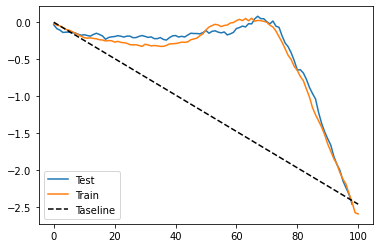

In [12]:
gain_curve_test = cumulative_gain(test.assign(cate=cate_test_transf_y),
                                "cate", y="sales", t="price")

gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[["temp", "weekday", "cost"]])),
                                   "cate", y="sales", t="price")


plt.plot(gain_curve_test, label="Test")
plt.plot(gain_curve_train, label="Train")
plt.plot([0, 100], [0, elast(test, "sales", "price")], linestyle="--", color="black", label="Taseline")
plt.legend();

对于这些数据，看起来具有转换目标的模型比随机模型要好得多。不仅如此，训练和测试结果非常接近，因此这里的方差不是问题。但这只是这个数据集的一个特征。如果您还记得，当我们探索二元处理案例时，情况并非如此。在那里，模型的表现不是很好。
 
### 非线性处理效果
 
谈到了连续案例，我们需要处理的房间里还有一头大象。我们假设干预效果呈线性关系。然而，这很少是一个合理的假设。通常，干预效果以一种或另一种形式饱和。在我们的示例中，可以合理地认为，在价格上涨的第一个单位时需求会下降得更快，但随后会下降得更慢。
 
![img](./data/img/plug-and-play-estimators/non-linear-case.png)
 
这里的问题是**弹性或干预效果随干预本身而变化**。在我们的示例中，干预效果在曲线开始时更加强烈，而随着价格的上涨而减弱。同样，假设您有两种类型的日子：炎热的日子（黄色）和寒冷的日子（蓝色），我们想用因果模型区分这两者。问题是因果模型应该预测弹性，但在非线性情况下，如果我们查看曲线中不同的价格点（右图），炎热和寒冷天的弹性可能相同。
 
解决这个问题没有简单的方法，我承认我仍在研究什么最有效。目前，我所做的事情是尝试考虑干预效果的函数形式，并以某种方式将其线性化。例如，需求通常具有以下函数形式，其中较高的 \\(\alpha\\)s 意味着随着价格的每次上涨，需求下降得更快
 
$
D_i = \dfrac{1}{P_i^{\alpha}}
$

所以，如果我对需求 \\(Y\\) 和价格 \\(T\\) 都应用对数转换，我应该得到线性的东西。

$
\begin{align}
log(D)_i &= log\bigg(\dfrac{1}{P_i^{\alpha}}\bigg) \\
&= log(1) - log(P_i^{\alpha}) \\
&= log(1) - log(P_i^{\alpha}) \\
&= - \alpha * log(P_i) \\
\end{align}
$
 
线性化并不是那么容易做到的，因为它需要一些思考。但你也可以尝试一些东西，看看什么效果最好。通常，对数和平方根之类的东西会有所帮助。
 
## 关键思想

我们现在正朝着使用机器学习模型估计条件平均干预效果的方向发展。这样做的最大挑战是使预测模型适应估计因果效应的模型。另一种思考方式是，预测模型专注于将结果 Y 估计为特征 X 的函数，可能还有干预 T \\(Y = M(X, T) \\) 而因果模型需要估计这个输出函数在处理 \\(\partial Y = \partial M(X, T) \\) 上。这不是简单方法就可以解决的，因为虽然我们确实观察到了结果 Y，但我们不能观察到 \\(\partial Y\\)，至少在个体样本层面上不能。因此，在为我们的模型设计目标函数时，我们需要具有创造性。
 
在这里，我们看到了一种非常简单的目标转换技术。这个想法是将原始目标 Y 与干预 T 结合起来，形成一个转换后的目标，期望它等于 CATE。有了这个新目标，我们可以插入任何预测性 ML 模型来估计它，然后模型预测将是 CATE 估计。附带说明一下，除了目标转换之外，此方法也称为 **F-Learner**。
 
尽管如此简单，但也需要付出代价。转换后的目标是对个体干预效果的非常嘈杂的估计，并且该噪声将以方差的形式转移到模型估计中。这使得目标转换更适合大数据应用，在这些场景中，由于样本量很大，方差不是个大问题。目标转换方法的另一个缺点是它仅针对二元或分类处理定义。我们尽最大努力提出该方法的连续版本，甚至最终得出了一些似乎可行的方法，但到目前为止，还没有可靠的理论框架来支持它。
 
最后，我们以对非线性干预效果及其带来的挑战的讨论结束。也就是说，当干预效果随干预本身而变化时，我们可能会错误地认为单位具有相同的干预反应曲线，因为它们对干预的反应相同，但实际上它们只是接受了不同的干预量。
